In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time        
np.random.seed(int(time.time()))

In [2]:
# Used to avoid calculating near and far neighbors more than once
near_neighbors = {}
far_neighbors = {}

def evolve(A, R, J, h):
    rows, cols = A.shape
    
    update_order = np.array(range(0,rows*cols))
    np.random.shuffle(update_order)
    changed = False
    for index in update_order:
        r = int(index/rows)
        c = index%rows
        old_state = float(A[r,c])
        near = 0
        far = 0
        
        # If I've never calculated my near and far neighbors before...
        if (index not in near_neighbors.keys()):
            near_neighbors[index] = []
            far_neighbors[index] = []
            for i in range(rows):
                for j in range(cols):
                    xdist = np.abs(r-i)
                    ydist = np.abs(c-j)
                    if (xdist > rows/2):
                        xdist = rows - xdist
                    if (ydist > cols/2):
                        ydist = cols - ydist
                    d = xdist + ydist
                    if (d <= R[0]):
                        near += A[i,j]
                        near_neighbors[index].append([i,j])
                    elif(d < R[1]):
                        far += A[i,j]
                        far_neighbors[index].append([i,j])
            new_state = np.sign(J[0]*near+J[1]*far+h)
            if (new_state == 0):
                new_state = 1
            A[r,c] = new_state
        else:
            for x in near_neighbors[index]:
                near += A[x[0],x[1]]
            for x in far_neighbors[index]:
                far += A[x[0],x[1]]
            new_state = np.sign(J[0]*near+J[1]*far+h)
            if (new_state == 0):
                new_state = 1
            A[r,c] = new_state
        if (old_state != new_state):
            changed = True
    return A, changed

In [7]:
dim = 30
J = [1, -0.7]
R = [10, 6]
h = 9

A = np.random.choice([-1, 1], size=(dim,dim), p=[0.5, 0.5])

changed = True
i=0
progression = []
while (changed == True):
    progression.append(A.copy())
    A, changed = evolve(A, R, J, h)
    i+=1

<IPython.core.display.Javascript object>


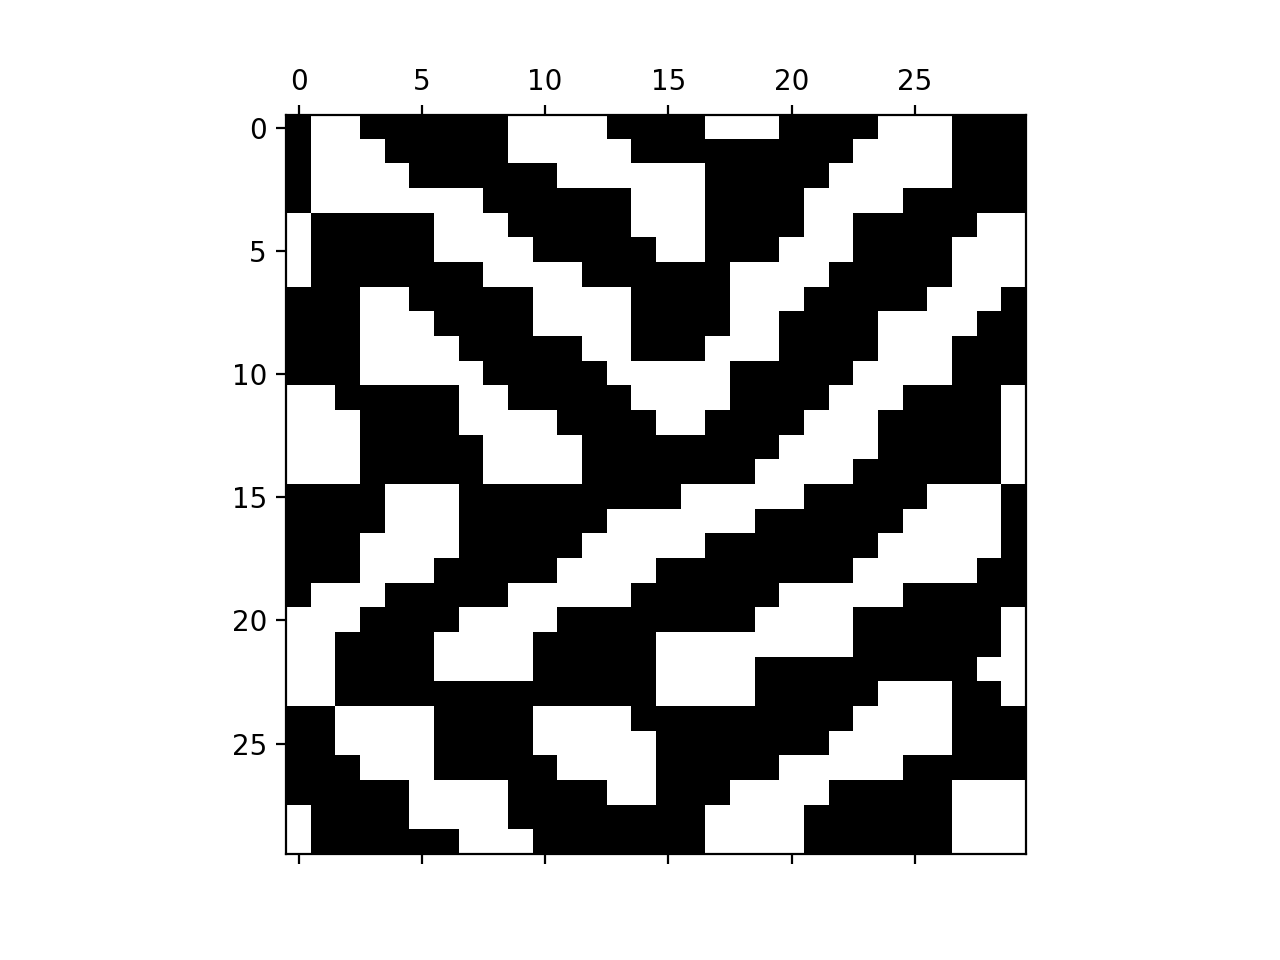

In [8]:
def update(i):
    time.sleep(0.5)
    mat.set_data(progression[i])
    

fig, ax = plt.subplots()
mat = ax.matshow(progression[0], cmap='binary', vmin=-1, vmax=1)
ani = animation.FuncAnimation(fig, update, interval=50, frames=len(progression), repeat=False)
plt.show()